In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
#removing the column with most number of null values as it is not possible to work with 
titanic_data = titanic_data.drop('Cabin',axis=1)
#replacing the data wherever possible 
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [8]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
#since embarked is an object type , therefore we use mode to fill in the missing values for this column
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [24]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

NULL values removed from the dataset


In [11]:
#checking for how many survived 
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

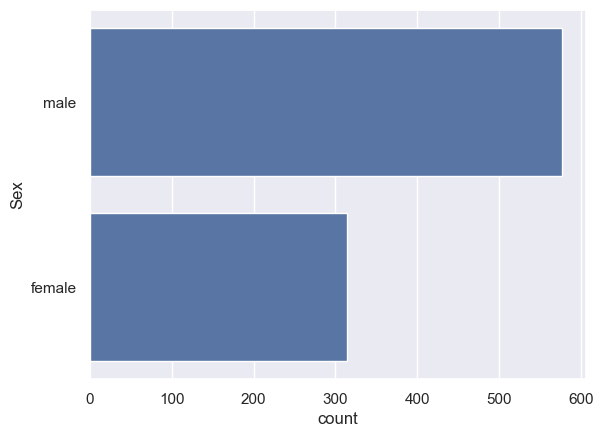

In [13]:
sns.set()
sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

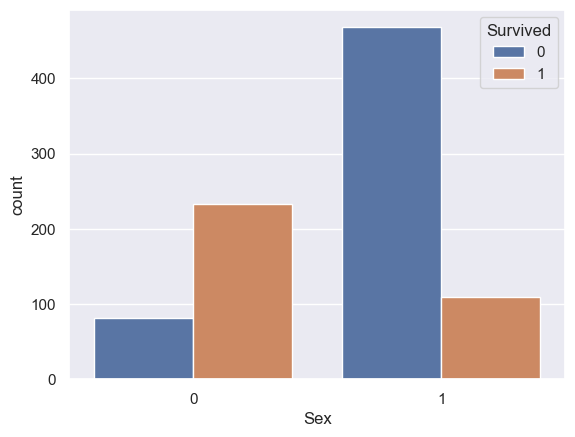

In [22]:
sns.set()
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [20]:
#encoding the labels 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


In [26]:
titanic_data.head(10)
#where sex==1 is male and 0 is female , embarked 0 is C , Q is 1 and S is 2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0


In [27]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [28]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [29]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [31]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [32]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [33]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

Accuracy score of training data :  0.8117977528089888
[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [34]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)


Accuracy score of test data: 0.7877094972067039


In [35]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [1]:
!pip install pyngrok
import subprocess
import os 
from pyngrok import ngrok

  Obtaining dependency information for pyngrok from https://files.pythonhosted.org/packages/a5/fc/76c79a1865821b742b8ee226bc0ec571558d90c4f86652161bc86cc5d81a/pyngrok-7.1.3-py3-none-any.whl.metadata


In [2]:
#setting up with authentication token 
ngrok.set_auth_token("2cx6psogChau8uzks7xQ1rG2gcD_3ZLeAPTb3GCGzrsCpFnNB")

#running the flask app
os.system("nohup python -m flask run --no-reload &")
#opening ngrok tunnel to the flask app using http protocol
proc = subprocess.Popen(["ngrok","http","5000"])

#retrive ngrok's public url
public_url = ngrok.connect(addr="5000",proto="http")
print("Public URL : ",public_url)

Public URL :  NgrokTunnel: "https://4a9e-115-245-68-163.ngrok-free.app" -> "http://localhost:5000"  


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Titanic Survival Prediction</title>
        <style>
            body {
                background-color: black;
                color: white;
                font-family: Arial, sans-serif;
                text-align: center;
                padding: 20px;
            }
            #predictionForm {
                display: inline-block;
                text-align: left;
            }
            img {
                max-width: 100%;
                height: auto;
            }
        </style>
    </head>
    <body>
        <h2>Titanic Survival Prediction</h2>
        <form id="predictionForm" method="post" action="/predict">
            <label for="pclass">Pclass:</label>
            <input type="text" id="pclass" name="pclass"><br><br>

            <label for="sex">Sex (1 for male, 0 for female):</label>
            <input type="text" id="sex" name="sex"><br><br>

            <label for="age">Age:</label>
            <input type="text" id="age" name="age"><br><br>

            <label for="sibsp">SibSp:</label>
            <input type="text" id="sibsp" name="sibsp"><br><br>

            <label for="parch">Parch:</label>
            <input type="text" id="parch" name="parch"><br><br>

            <label for="fare">Fare:</label>
            <input type="text" id="fare" name="fare"><br><br>

            <label for="embarked">Embarked (2 for S, 0 for C, 1 for Q):</label>
            <input type="text" id="embarked" name="embarked"><br><br>

            <button type="button" onclick="predictSurvival()">Predict</button>
        </form>

        <p id="predictionResult"></p>

        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic Image">

        <script>
            function predictSurvival() {
                var xhr = new XMLHttpRequest();
                var url = "/predict";
                var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

                xhr.open("POST", url, true);
                xhr.onreadystatechange = function () {
                    if (xhr.readyState === 4 && xhr.status === 200) {
                        var response = JSON.parse(xhr.responseText);
                        document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                    }
                };
                xhr.send(data);
            }
        </script>
    </body>
    </html>
    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://5293-115-245-68-163.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [27/Feb/2024 19:21:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2024 19:21:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/Feb/2024 19:24:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2024 19:24:04] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\Aniket\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [27/Feb/2024 19:24:35] "POST /predict HTTP/1.1" 200 -
